# Exploratory Analysis Notebook:
    During exploratory analysis, data visualization techniques such as scatter plots, histograms, and box plots are employed to explore the distribution and relationships between variables

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

import wrangle as w 

# Acquiring our Data

In [2]:
df = pd.read_csv('prepared_zillow.csv')

# Outliers

     When identiifying outliers we use it IQR method

In [3]:
from sklearn.ensemble import IsolationForest

In [4]:
model = IsolationForest(contamination=0.05)

In [5]:
model.fit(df)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [6]:
predictions = model.predict(df)

In [7]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
clean_data = df[predictions == 1]

In [9]:
print(f'the orignal lenght of original data is {len(df)}')
print(f'the length of new data is {len(clean_data)}')
print(f'we dropped {len(df) - len(clean_data)} rows')

the orignal lenght of original data is 2140235
the length of new data is 2033223
we dropped 107012 rows


In [10]:
# reassign our dataframe to the cleaned data 
df = clean_data

In [11]:
clean_data.to_csv('explore_zillow.csv', index=False)

# Before our explore stage we need to split our data into train, validate and test sets.

In [12]:
train, validate, test = w.split(df)

In [13]:
train.head()

,bedroom_count,bathroom_count,squarefoot,assessed_tax_value,year_built,tax_amount,fips
1084742,3.0,2.0,1344.0,265150.0,1908,3202.39,6037
1479904,3.0,2.0,1500.0,490000.0,1988,7265.48,6037
766170,3.0,3.0,1842.0,306065.0,1992,4008.65,6037
448289,3.0,3.0,2129.0,144926.0,1976,1519.08,6059
820982,4.0,3.0,2609.0,693807.0,1968,8193.28,6037


    In our explore we want to know how does the features (everything but the aassessed_tax_value), affects the drive of the target variable (assessed_tax_value). We also want to look at what the distribution of our data is and identify outliers and how to handle them.

# Identifying outliers:
    
    When looking for outliers there are a few ways to visualize them. We can use boxplots check for outliers. We can also use IQR to only grab our data that is not anomolous, to better help our model in performance.

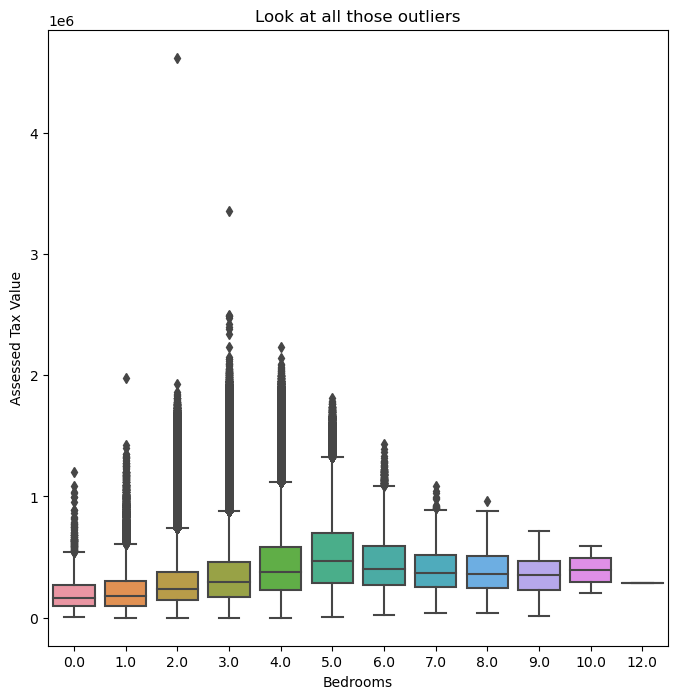

In [14]:
plt.figure(figsize= (8,8))
sns.boxplot(data= df, x = 'bedroom_count', y='assessed_tax_value')
plt.title('Look at all those outliers')
plt.xlabel('Bedrooms',)
plt.ylabel('Assessed Tax Value')
plt.show()

### There is a lot of noise going on here im going to try and make it a little clearer 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
# Subset our data
subset_bedroom = df[['bedroom_count', 'assessed_tax_value']]

In [18]:
scaled_data = scaler.fit_transform(subset_bedroom)

In [19]:
scaled_df = pd.DataFrame(scaled_data,columns=[ 'bedroom_count', 'assessed_tax_value'])

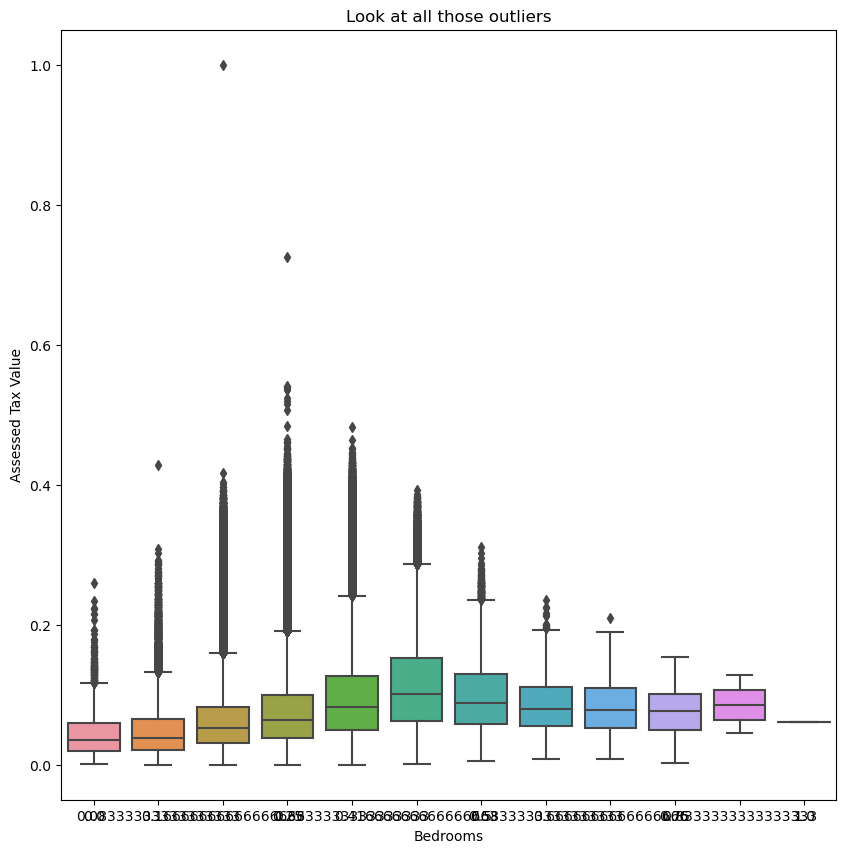

In [20]:
plt.figure(figsize= (10,10))
sns.boxplot(data= scaled_df, x = 'bedroom_count', y='assessed_tax_value')
plt.title('Look at all those outliers')
plt.xlabel('Bedrooms',)
plt.ylabel('Assessed Tax Value')
plt.show()

# Checking our Correlation Coefficients

<Axes: >

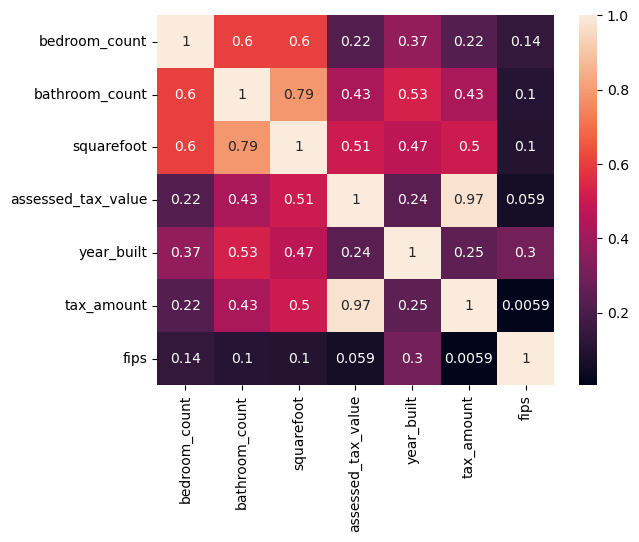

In [21]:
corr_table = df.corr()
sns.heatmap(corr_table, annot=True)

# Explore the relationships with our target variable 

<Axes: ylabel='Frequency'>

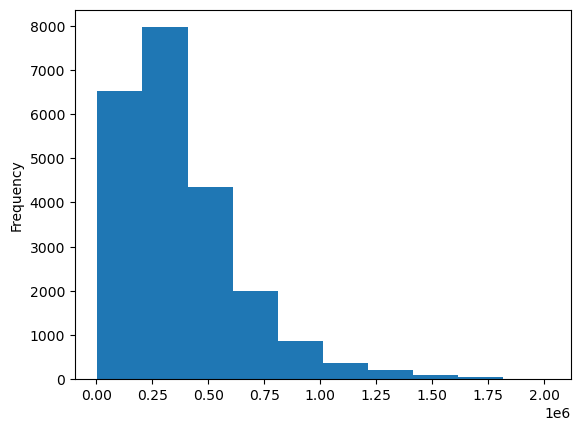

In [23]:
train.assessed_tax_value.plot(kind='hist')

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: xlabel='bedroom_count', ylabel='assessed_tax_value'>

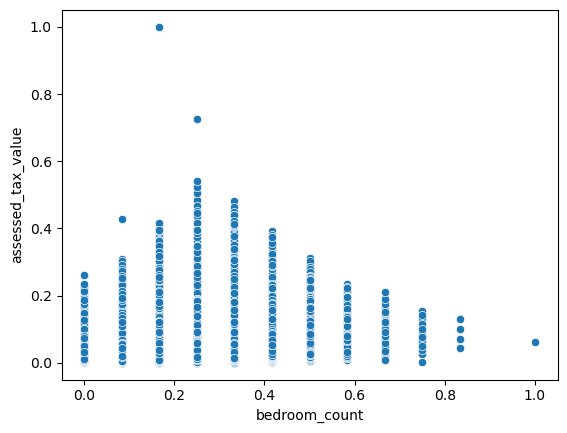

In [31]:
sns.scatterplot(data=scaled_df, x='bedroom_count', y= 'assessed_tax_value')